# Solución de ecuaciones de una variable

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/1.0_Solucion_ecuaciones_de_una_variable.ipynb)

In [513]:
import numpy as np
import pandas as pd

from importlib import reload
import lib.metodos_solucion_ecuaciones
reload(lib.metodos_solucion_ecuaciones)
from lib.metodos_solucion_ecuaciones import graficar, met_biseccion, met_regula_falsi, met_newton_raphson

## Ejercicio 1
Utilizando el método grfáfico, encontrar la solución a la ecuación $e^x - 3 \sin(x) -3x$

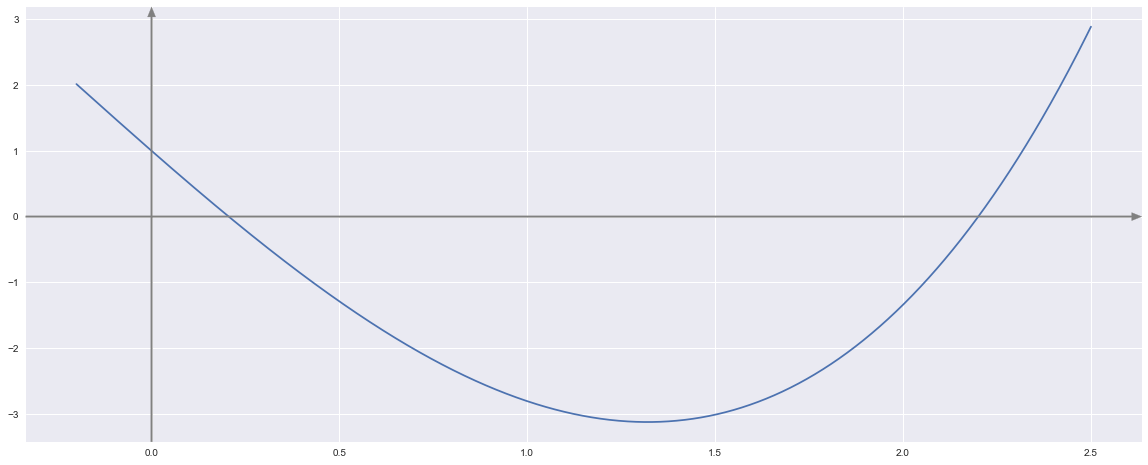

In [514]:
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
graficar(f, -0.2, 2.5)

## Ejercicio 2
Utilizando el método grfáfico, encontrar la solución a la ecuación $e^{-2x} = -\frac{1}{x}$

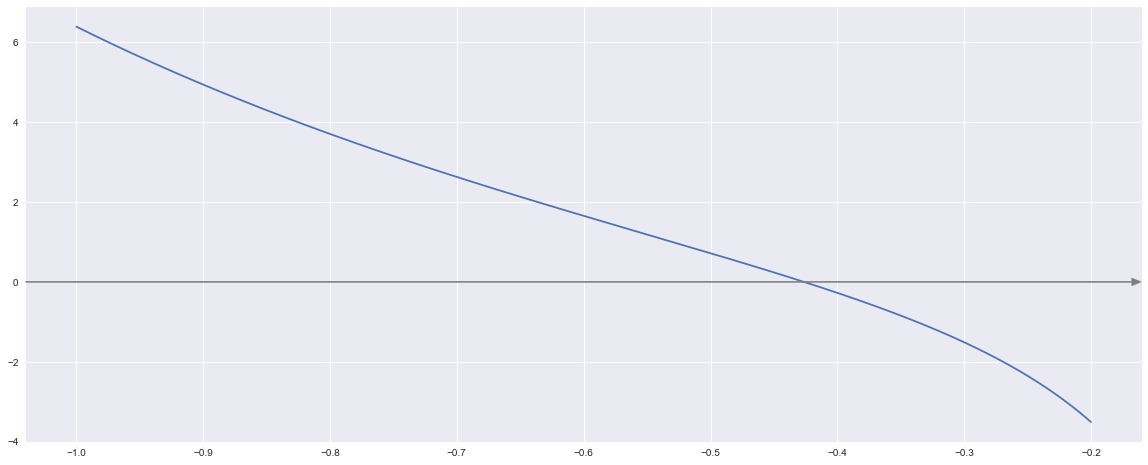

In [515]:
f = lambda x: np.e**(-2*x) + 1/x
graficar(f, -1, -0.2)

## Ejercicio 3
Utilizando el método grfáfico, encontrar la solución a la ecuación $x^{20} - 1 = 0$

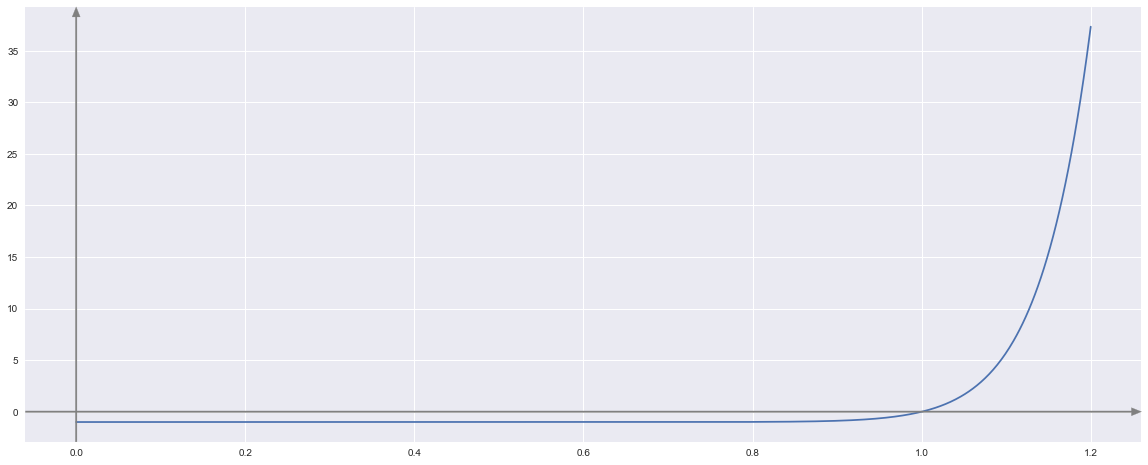

In [516]:
f = lambda x: x**20 - 1
graficar(f, 0, 1.2)

## Ejercicio 4
Utilizando el método grfáfico, encontrar la solución a la ecuación $\sin(3x) - \cos(3x) = 1, \ \  -2.5\leq x \leq 0$

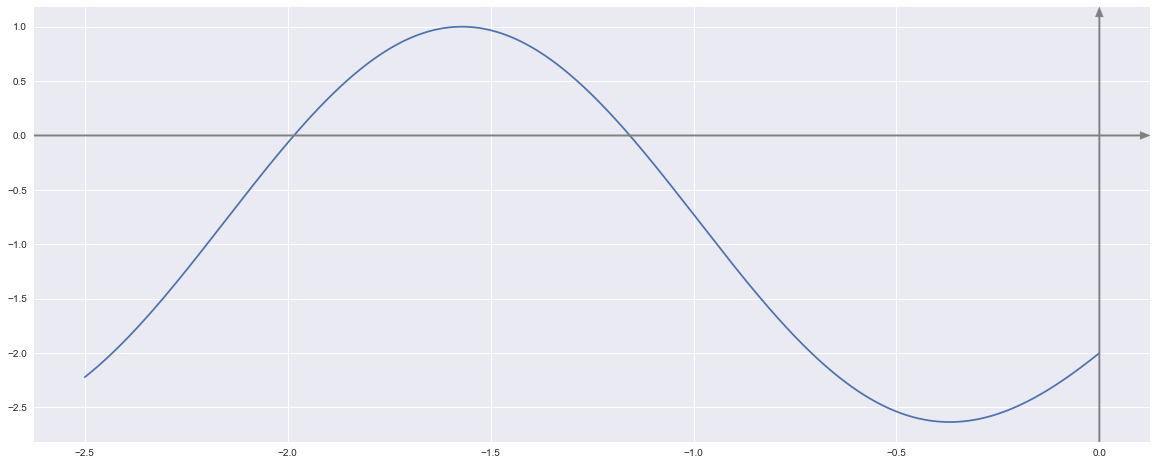

In [517]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
graficar(f, -2.5, 0)

In [518]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
met_biseccion(f, -1.5, -0.5, 1e-4, n=50)

ite 1 : a_0  = -1.5000, b_0  = -0.5000, p_1  = -1.00000 | e_abs: 5.000000e-01
ite 2 : a_1  = -1.5000, b_1  = -1.0000, p_2  = -1.25000 | e_abs: 2.500000e-01
ite 3 : a_2  = -1.2500, b_2  = -1.0000, p_3  = -1.12500 | e_abs: 1.250000e-01
ite 4 : a_3  = -1.2500, b_3  = -1.1250, p_4  = -1.18750 | e_abs: 6.250000e-02
ite 5 : a_4  = -1.1875, b_4  = -1.1250, p_5  = -1.15625 | e_abs: 3.125000e-02
ite 6 : a_5  = -1.1875, b_5  = -1.1562, p_6  = -1.17188 | e_abs: 1.562500e-02
ite 7 : a_6  = -1.1719, b_6  = -1.1562, p_7  = -1.16406 | e_abs: 7.812500e-03
ite 8 : a_7  = -1.1641, b_7  = -1.1562, p_8  = -1.16016 | e_abs: 3.906250e-03
ite 9 : a_8  = -1.1602, b_8  = -1.1562, p_9  = -1.15820 | e_abs: 1.953125e-03
ite 10: a_9  = -1.1582, b_9  = -1.1562, p_10 = -1.15723 | e_abs: 9.765625e-04
ite 11: a_10 = -1.1572, b_10 = -1.1562, p_11 = -1.15674 | e_abs: 4.882812e-04
ite 12: a_11 = -1.1572, b_11 = -1.1567, p_12 = -1.15698 | e_abs: 2.441406e-04
ite 13: a_12 = -1.1570, b_12 = -1.1567, p_13 = -1.15686 | e_abs:

-1.15692138671875

In [519]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
met_regula_falsi(f, -1.5, -0.5, 1e-4, n=50)

ite 1 : a_0  = -1.5000, b_0  = -0.5000, p_1  = -1.22398 | e_abs: 2.760155e-01
ite 2 : a_1  = -1.2240, b_1  = -0.5000, p_2  = -1.15325 | e_abs: 7.073079e-02
ite 3 : a_2  = -1.2240, b_2  = -1.1533, p_3  = -1.15716 | e_abs: 3.905268e-03
ite 4 : a_3  = -1.1572, b_3  = -1.1533, p_4  = -1.15697 | e_abs: 1.892670e-04
ite 5 : a_4  = -1.1570, b_4  = -1.1533, p_5  = -1.15697 | e_abs: 4.540302e-07
>>> Solución encontrada después de 5 iteraciones: x->-1.156969255760549


-1.1569692557605487

In [520]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
df= lambda x: 3*np.cos(3*x) + 2*np.sin(2*x)
met_newton_raphson(f, df, -1, 1e-4)

ite 1 : p_0  = -1.0000, p_1  = -1.15140 | e_abs: 1.513965e-01
ite 2 : p_1  = -1.1514, p_2  = -1.15695 | e_abs: 5.553071e-03
ite 3 : p_2  = -1.1569, p_3  = -1.15697 | e_abs: 1.966690e-05
>>> Solución encontrada después de 3 iteraciones: x->-1.156969254417353


-1.156969254417353

In [521]:
f = lambda x: x**20 - 1
met_biseccion(f, 0, 1.2, tol=1e-8, n=500)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.60000 | e_abs: 6.000000e-01
ite 2 : a_1  = 0.6000, b_1  = 1.2000, p_2  = 0.90000 | e_abs: 3.000000e-01
ite 3 : a_2  = 0.9000, b_2  = 1.2000, p_3  = 1.05000 | e_abs: 1.500000e-01
ite 4 : a_3  = 0.9000, b_3  = 1.0500, p_4  = 0.97500 | e_abs: 7.500000e-02
ite 5 : a_4  = 0.9750, b_4  = 1.0500, p_5  = 1.01250 | e_abs: 3.750000e-02
ite 6 : a_5  = 0.9750, b_5  = 1.0125, p_6  = 0.99375 | e_abs: 1.875000e-02
ite 7 : a_6  = 0.9937, b_6  = 1.0125, p_7  = 1.00312 | e_abs: 9.375000e-03
ite 8 : a_7  = 0.9937, b_7  = 1.0031, p_8  = 0.99844 | e_abs: 4.687500e-03
ite 9 : a_8  = 0.9984, b_8  = 1.0031, p_9  = 1.00078 | e_abs: 2.343750e-03
ite 10: a_9  = 0.9984, b_9  = 1.0008, p_10 = 0.99961 | e_abs: 1.171875e-03
ite 11: a_10 = 0.9996, b_10 = 1.0008, p_11 = 1.00020 | e_abs: 5.859375e-04
ite 12: a_11 = 0.9996, b_11 = 1.0002, p_12 = 0.99990 | e_abs: 2.929687e-04
ite 13: a_12 = 0.9999, b_12 = 1.0002, p_13 = 1.00005 | e_abs: 1.464844e-04
ite 14: a_13 = 0.9999, b_

1.000000002980232

In [522]:
f = lambda x: x**20 - 1
met_regula_falsi(f, 0, 1.2, tol=1e-8, n=500)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.03130 | e_abs: 3.130086e-02
ite 2 : a_1  = 0.0313, b_1  = 1.2000, p_2  = 0.06179 | e_abs: 3.048441e-02
ite 3 : a_2  = 0.0618, b_2  = 1.2000, p_3  = 0.09147 | e_abs: 2.968925e-02
ite 4 : a_3  = 0.0915, b_3  = 1.2000, p_4  = 0.12039 | e_abs: 2.891484e-02
ite 5 : a_4  = 0.1204, b_4  = 1.2000, p_5  = 0.14855 | e_abs: 2.816062e-02
ite 6 : a_5  = 0.1485, b_5  = 1.2000, p_6  = 0.17598 | e_abs: 2.742608e-02
ite 7 : a_6  = 0.1760, b_6  = 1.2000, p_7  = 0.20269 | e_abs: 2.671069e-02
ite 8 : a_7  = 0.2027, b_7  = 1.2000, p_8  = 0.22870 | e_abs: 2.601397e-02
ite 9 : a_8  = 0.2287, b_8  = 1.2000, p_9  = 0.25404 | e_abs: 2.533542e-02
ite 10: a_9  = 0.2540, b_9  = 1.2000, p_10 = 0.27871 | e_abs: 2.467457e-02
ite 11: a_10 = 0.2787, b_10 = 1.2000, p_11 = 0.30274 | e_abs: 2.403096e-02
ite 12: a_11 = 0.3027, b_11 = 1.2000, p_12 = 0.32615 | e_abs: 2.340413e-02
ite 13: a_12 = 0.3261, b_12 = 1.2000, p_13 = 0.34894 | e_abs: 2.279366e-02
ite 14: a_13 = 0.3489, b_

0.999999918906174

In [523]:
f = lambda x: np.sin(3*x) - np.cos(2*x) -1
df= lambda x: 3*np.cos(3*x) + 2*np.sin(2*x)
met_newton_raphson(f, df, -1, 1e-10)

ite 1 : p_0  = -1.0000, p_1  = -1.15140 | e_abs: 1.513965e-01
ite 2 : p_1  = -1.1514, p_2  = -1.15695 | e_abs: 5.553071e-03
ite 3 : p_2  = -1.1569, p_3  = -1.15697 | e_abs: 1.966690e-05
ite 4 : p_3  = -1.1570, p_4  = -1.15697 | e_abs: 2.519334e-10
ite 5 : p_4  = -1.1570, p_5  = -1.15697 | e_abs: 0.000000e+00
>>> Solución encontrada después de 5 iteraciones: x->-1.156969254669286


-1.1569692546692865

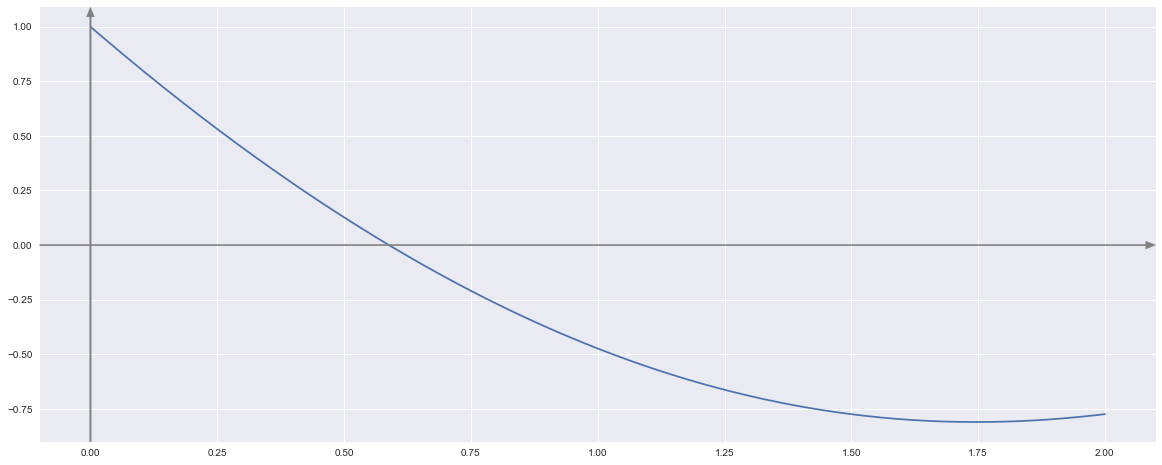

In [524]:
f = lambda x: np.exp(-x) - np.sin(x)
graficar(f, 0, 2)

In [528]:
f = lambda x: np.exp(-x) - np.sin(x)
df= lambda x: -np.exp(-x) - np.cos(x)
print('Bisección')
lista_error_1, sol = met_biseccion(f, 0, 2, 1e-15, n=500, verbose=False, deploy_error=True)
print('regula false')
lista_error_2, sol = met_regula_falsi(f, 0, 2, 1e-15, verbose=False, deploy_error=True)
print('Newton - Rhapson')
lista_error_3, sol = met_newton_raphson(f, df, 0.2, 1e-15, verbose=True, deploy_error=True)

Bisección
>>> Solución encontrada después de 51 iteraciones: x->0.588532743981861
regula false
>>> Solución encontrada después de 22 iteraciones: x->0.588532743981862
Newton - Rhapson
ite 1 : p_0  = 0.2000, p_1  = 0.54471 | e_abs: 3.447089e-01
ite 2 : p_1  = 0.5447, p_2  = 0.58780 | e_abs: 4.308644e-02
ite 3 : p_2  = 0.5878, p_3  = 0.58853 | e_abs: 7.372040e-04
ite 4 : p_3  = 0.5885, p_4  = 0.58853 | e_abs: 2.175110e-07
ite 5 : p_4  = 0.5885, p_5  = 0.58853 | e_abs: 1.887379e-14
>>> Solución exacta encontrada después de 5 iteraciones: x->0.588532743981861


In [530]:
from lib.metodos_solucion_ecuaciones import estudio_error
pd.options.display.float_format = '{:e}'.format
estudio_error([lista_error_1, lista_error_2, lista_error_3], orden=1)

,0,1,2,3,4,5
0,2.000000e+00,----,2,----,3.447089e-01,----
1,1.000000e+00,5.000000e-01,1.127420e+00,5.637000e-01,4.308644e-02,1.250000e-01
2,5.000000e-01,5.000000e-01,4.136102e-01,3.669000e-01,7.372040e-04,1.710000e-02
3,2.500000e-01,5.000000e-01,1.010677e-01,2.444000e-01,2.175110e-07,3.000000e-04
4,1.250000e-01,5.000000e-01,1.971784e-02,1.951000e-01,1.887379e-14,0.000000e+00
5,6.250000e-02,5.000000e-01,3.664540e-03,1.858000e-01,----,----
6,3.125000e-02,5.000000e-01,6.748191e-04,1.841000e-01,----,----
7,1.562500e-02,5.000000e-01,1.240560e-04,1.838000e-01,----,----
8,7.812500e-03,5.000000e-01,2.279881e-05,1.838000e-01,----,----
9,3.906250e-03,5.000000e-01,4.189689e-06,1.838000e-01,----,----
